<a href="https://colab.research.google.com/github/ADCO02/trabajoPreparacionDatos/blob/main/Notebook.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Trabajo:** Online Shoppers Purchasing Intention

Preparación de datos

## Imports

In [39]:
import numpy as np
import pandas as pd

from sklearn.model_selection import RepeatedStratifiedKFold, GridSearchCV, StratifiedKFold

from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, FunctionTransformer, StandardScaler, MinMaxScaler, RobustScaler, PowerTransformer, QuantileTransformer
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import SelectKBest, f_classif

import matplotlib.pyplot as plt

from imblearn.over_sampling import RandomOverSampler
from imblearn import FunctionSampler
from imblearn.pipeline import Pipeline

## Introducción

## Carga y explicación de los datos

In [6]:
!wget -O online_shoppers.zip "https://archive.ics.uci.edu/static/public/468/online+shoppers+purchasing+intention+dataset.zip"
!unzip -o online_shoppers.zip
!ls -la

--2026-01-13 14:05:41--  https://archive.ics.uci.edu/static/public/468/online+shoppers+purchasing+intention+dataset.zip
Resolving archive.ics.uci.edu (archive.ics.uci.edu)... 128.195.10.252
Connecting to archive.ics.uci.edu (archive.ics.uci.edu)|128.195.10.252|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified
Saving to: ‘online_shoppers.zip’

online_shoppers.zip     [  <=>               ]   1.02M  2.87MB/s    in 0.4s    

2026-01-13 14:05:42 (2.87 MB/s) - ‘online_shoppers.zip’ saved [1072219]

Archive:  online_shoppers.zip
 extracting: online_shoppers_intention.csv  
total 2112
drwxr-xr-x 1 root root    4096 Jan 13 14:05 .
drwxr-xr-x 1 root root    4096 Jan 13 13:30 ..
drwxr-xr-x 4 root root    4096 Dec 11 14:34 .config
-rwx------ 1 root root 1072063 May 22  2023 online_shoppers_intention.csv
-rw-r--r-- 1 root root 1072219 Jan 13 14:05 online_shoppers.zip
drwxr-xr-x 1 root root    4096 Dec 11 14:34 sample_data


In [7]:
df = pd.read_csv('online_shoppers_intention.csv')
df.shape

(12330, 18)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12330 entries, 0 to 12329
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Administrative           12330 non-null  int64  
 1   Administrative_Duration  12330 non-null  float64
 2   Informational            12330 non-null  int64  
 3   Informational_Duration   12330 non-null  float64
 4   ProductRelated           12330 non-null  int64  
 5   ProductRelated_Duration  12330 non-null  float64
 6   BounceRates              12330 non-null  float64
 7   ExitRates                12330 non-null  float64
 8   PageValues               12330 non-null  float64
 9   SpecialDay               12330 non-null  float64
 10  Month                    12330 non-null  object 
 11  OperatingSystems         12330 non-null  int64  
 12  Browser                  12330 non-null  int64  
 13  Region                   12330 non-null  int64  
 14  TrafficType           

In [ ]:
df.describe()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,OperatingSystems,Browser,Region,TrafficType
count,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000
mean,2.315166,80.818611,0.503569,34.472398,31.731468,1194.746220,0.022191,0.043073,5.889258,0.061427,2.124006,2.357097,3.147364,4.069586
std,3.321784,176.779107,1.270156,140.749294,44.475503,1913.669288,0.048488,0.048597,18.568437,0.198917,0.911325,1.717277,2.401591,4.025169
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000
25%,0.000000,0.000000,0.000000,0.000000,7.000000,184.137500,0.000000,0.014286,0.000000,0.000000,2.000000,2.000000,1.000000,2.000000
50%,1.000000,7.500000,0.000000,0.000000,18.000000,598.936905,0.003112,0.025156,0.000000,0.000000,2.000000,2.000000,3.000000,2.000000
75%,4.000000,93.256250,0.000000,0.000000,38.000000,1464.157214,0.016813,0.050000,0.000000,0.000000,3.000000,2.000000,4.000000,4.000000
max,27.000000,3398.750000,24.000000,2549.375000,705.000000,63973.522230,0.200000,0.200000,361.763742,1.000000,8.000000,13.000000,9.000000,20.000000


In [ ]:
df.head()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,1,1,1,1,Returning_Visitor,False,False
1,0,0.0,0,0.0,2,64.000000,0.00,0.10,0.0,0.0,Feb,2,2,1,2,Returning_Visitor,False,False
2,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,4,1,9,3,Returning_Visitor,False,False
3,0,0.0,0,0.0,2,2.666667,0.05,0.14,0.0,0.0,Feb,3,2,2,4,Returning_Visitor,False,False
4,0,0.0,0,0.0,10,627.500000,0.02,0.05,0.0,0.0,Feb,3,3,1,4,Returning_Visitor,True,False


En resumen: sin nulos (aunque tendrá su propia sección), todo tipo de variables (numéricas, categóricas, booleanas --> crear listas), variables muy asimétricas (máximo exageradamente grande en comparación a la media, como en Administrative_Duration, ProductRelated_Duration o PageValues), abundancia de ceros (en la mediana). La variable objetivo, "Revenue", de tipo booleano, luego estamos ante un problema de clasificación binaria

## Estudio de Duplicados y Nulos

### Duplicados

In [ ]:
dups = df.duplicated()

print("Existencia de duplicados: ", dups.any())

print("Número de instancias duplicadas: ", dups.sum())

df[dups].head()

Existencia de duplicados:  True
Número de instancias duplicadas:  125


,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
158,0,0.0,0,0.0,1,0.0,0.2,0.2,0.0,0.0,Feb,1,1,1,3,Returning_Visitor,False,False
159,0,0.0,0,0.0,1,0.0,0.2,0.2,0.0,0.0,Feb,3,2,3,3,Returning_Visitor,False,False
178,0,0.0,0,0.0,1,0.0,0.2,0.2,0.0,0.0,Feb,3,2,3,3,Returning_Visitor,False,False
418,0,0.0,0,0.0,1,0.0,0.2,0.2,0.0,0.0,Mar,1,1,1,1,Returning_Visitor,True,False
456,0,0.0,0,0.0,1,0.0,0.2,0.2,0.0,0.0,Mar,2,2,4,1,Returning_Visitor,False,False


Veamos si existen filas duplicadas ignorando la variable objetivo.

In [ ]:
dup_all = df.duplicated().sum()
dup_no_target = df.duplicated(subset=[c for c in df.columns if c.lower() != "revenue"]).sum()

print("Duplicados exactos (todas las columnas):", dup_all)
print("Duplicados ignorando target:", dup_no_target)


Duplicados exactos (todas las columnas): 125
Duplicados ignorando target: 125


Se han identificado 125 filas duplicadas exactas, lo que representa aproximadamente un 1% del conjunto de datos. Dado que el dataset no contiene identificadores únicos y que las observaciones representan sesiones de navegación agregadas, la presencia de duplicados es plausible. Además, no se detectan inconsistencias en la variable objetivo (Revenue). Por tanto, se decide mantener las filas duplicadas para preservar la distribución original de los datos.

### Nulos

In [ ]:
df.isnull().sum()

,0
Administrative,0
Administrative_Duration,0
Informational,0
Informational_Duration,0
ProductRelated,0
ProductRelated_Duration,0
BounceRates,0
ExitRates,0
PageValues,0
SpecialDay,0


Como adelantábamos al cargar los datos, no hay valores nulos, por lo que no hay necesidad de imputar.

In [9]:
X = df.drop(columns=["Revenue"])
y = df["Revenue"]

## Evaluación de modelos

Hablar sobre el balanceo (ya implícito en la función)

In [21]:
def evaluate(
    pipe,
    X,
    y,
    param_grid,
    scoring="balanced_accuracy",
    cv=StratifiedKFold(n_splits=3, shuffle=True, random_state=42),
    n_jobs=-1,
    refit=True,
    return_cv_results=False,
    verbose=0,
):
    """
    Evalúa un pipeline mediante GridSearchCV con CV estratificada.

    - pipe: sklearn Pipeline (incluye preprocesado + modelo final)
    - param_grid: dict/list de hiperparámetros (usa prefijo 'model__' para el estimador final)
    - scoring: métrica para optimizar (recomendado 'balanced_accuracy' si hay desbalanceo)
    - cv: si None -> StratifiedKFold(3)
    - return_cv_results: si True, devuelve además un DataFrame con cv_results_
    """

    gs = GridSearchCV(
        estimator=pipe,
        param_grid=param_grid,
        scoring=scoring,
        cv=cv,
        n_jobs=n_jobs,
        refit=refit,
        return_train_score=True,
        verbose=verbose,
    )

    gs.fit(X, y)

    best_idx = gs.best_index_
    mean = gs.cv_results_["mean_test_score"][best_idx]
    std = gs.cv_results_["std_test_score"][best_idx]

    summary = {
        "scoring": scoring,
        "best_score_mean": float(mean),
        "best_score_std": float(std),
        "best_params": gs.best_params_,
        "best_estimator": gs.best_estimator_,
    }

    if return_cv_results:
        results_df = pd.DataFrame(gs.cv_results_).sort_values("rank_test_score")
        return summary, results_df

    return summary

In [22]:
def evaluate_all(preprocess, model_grids, X, y):
  rows = []

  for name, model, grid, sampler in model_grids:
      print(f"\n{name}")
      pipe = Pipeline([
          ("preprocess", preprocess),
          ("sampler", sampler),
          ("model", model)
      ])

      res = evaluate(pipe, X, y, param_grid=grid, verbose=1)

      rows.append({
          "model": name,
          "best_score_mean": res["best_score_mean"],
          "best_score_std": res["best_score_std"],
      })

      print(f"  best {res['scoring']}: {res['best_score_mean']:.4f} ± {res['best_score_std']:.4f}")
      print(f"  best params: {res['best_params']}")

  return pd.DataFrame(rows)

In [25]:
rnd_st = 42

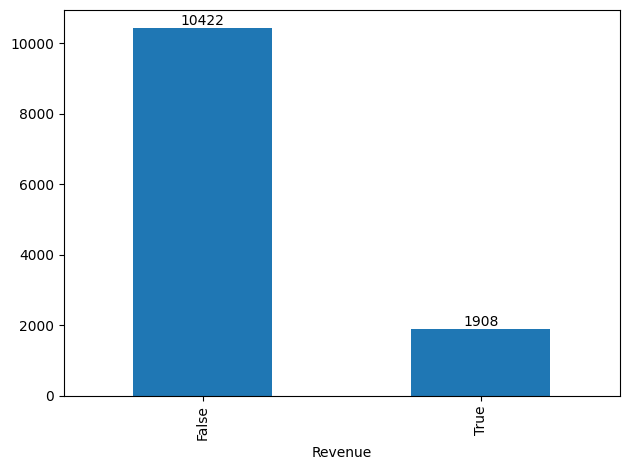

In [13]:
ax = y.value_counts().plot(kind="bar")

for container in ax.containers:
    ax.bar_label(container)

plt.tight_layout()
plt.show()

### Logistic Regression

In [26]:
lr = LogisticRegression(max_iter=2000, class_weight="balanced", random_state=rnd_st)

param_grid_lr = {
    "model__C": [0.1, 1, 10],
    "model__fit_intercept": [True, False],
}

### KNN

In [27]:
knn = KNeighborsClassifier()

ros = RandomOverSampler(random_state=42)

param_grid_knn = {
    "model__n_neighbors": [5, 11, 21],
    "model__weights": ["uniform", "distance"],
}

### Decision Tree

In [28]:
dt = DecisionTreeClassifier(class_weight="balanced", random_state=rnd_st)

param_grid_dt = {
    "model__max_depth": [None, 10, 20, 30],
    "model__min_samples_split": [2, 10],
}

### Random Forest

In [29]:
rf = RandomForestClassifier(class_weight="balanced", n_estimators=200, random_state=rnd_st)

param_grid_rf = {
    "model__max_depth": [None, 20],
    "model__min_samples_leaf": [1, 5],
}

In [30]:
noop = FunctionSampler(func=lambda X, y: (X, y))

model_grids = [
    ("LR",  lr,  param_grid_lr,  noop),
    ("KNN", knn, param_grid_knn, ros),
    ("DT",  dt,  param_grid_dt,  noop),
    ("RF",  rf,  param_grid_rf,  noop),
]

## Codificación

### Target
Aunque no sea necesario ya que internamente seguiría funcionando, las pasamos a 0/1

In [22]:
y = df["Revenue"].astype(int)

### Variables categóricas

Definir booleanas, categóricas puras e identificadoras.

In [10]:
cat_cols = [
  "Month", "VisitorType", "Weekend",
  "OperatingSystems", "Browser", "Region", "TrafficType"
]
num_cols = [c for c in X.columns if c not in cat_cols]

In [24]:
for col in cat_cols:
    print(f"{col}: {df[col].nunique()}")

Month: 10
VisitorType: 3
Weekend: 2
OperatingSystems: 8
Browser: 13
Region: 9
TrafficType: 20


Ninguna tiene una cantidad excesiva como para ser un problema para OHE

In [54]:
preprocess = ColumnTransformer(
    transformers=[
        ("num", "passthrough", num_cols),
        ("cat", OneHotEncoder(handle_unknown="ignore"), cat_cols),
    ]
)

results_df = evaluate_all(preprocess, model_grids, X, y)
results_df


LR
Fitting 3 folds for each of 6 candidates, totalling 18 fits


/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


  best balanced_accuracy: 0.8110 ± 0.0057
  best params: {'model__C': 1, 'model__fit_intercept': False}

KNN
Fitting 3 folds for each of 6 candidates, totalling 18 fits
  best balanced_accuracy: 0.7259 ± 0.0041
  best params: {'model__n_neighbors': 21, 'model__weights': 'distance'}

DT
Fitting 3 folds for each of 8 candidates, totalling 24 fits
  best balanced_accuracy: 0.8105 ± 0.0105
  best params: {'model__max_depth': 10, 'model__min_samples_split': 10}

RF
Fitting 3 folds for each of 4 candidates, totalling 12 fits
  best balanced_accuracy: 0.8390 ± 0.0076
  best params: {'model__max_depth': 20, 'model__min_samples_leaf': 5}


,model,best_score_mean,best_score_std
0,LR,0.810971,0.005669
1,KNN,0.725877,0.004071
2,DT,0.810478,0.010526
3,RF,0.839046,0.007630


El LR, aunque tiene el mejor resultado, genera un warning, probablemente porque aún no hemos escalado, lo que ya abordaremos más adelante. Los de árboles, DT y RF, le siguen, con resultados similares. KNN es el que peor desempeño tiene por ahora, por lo que nos centraremos en mejorar el resultado de este.

### Variables cíclicas

Month parece ser de tipo cíclica, podemos probar a codificarla así a ver si logramos alguna mejora en el KNN.

In [8]:
X["Month"].unique()

array(['Feb', 'Mar', 'May', 'Oct', 'June', 'Jul', 'Aug', 'Nov', 'Sep',
       'Dec'], dtype=object)

In [55]:
MONTH_MAP = {
    "Jan": 1, "January": 1,
    "Feb": 2, "February": 2,
    "Mar": 3, "March": 3,
    "Apr": 4, "April": 4,
    "May": 5,
    "Jun": 6, "June": 6,
    "Jul": 7, "July": 7,
    "Aug": 8, "August": 8,
    "Sep": 9, "September": 9,
    "Oct": 10, "October": 10,
    "Nov": 11, "November": 11,
    "Dec": 12, "December": 12,
}

def add_month_cyclical(X_df):
    X_df = X_df.copy()

    m = X_df["Month"]
    if pd.api.types.is_numeric_dtype(m):
        month_num = m.astype(float)
    else:
        month_num = m.astype(str).str.strip().map(MONTH_MAP)

    # Si alguna categoría no está en el mapa, fallará luego; lo dejamos explícito:
    if month_num.isna().any():
        unknown = X_df.loc[month_num.isna(), "Month"].unique()
        raise ValueError(f"Month contiene valores no mapeados: {unknown}")

    angle = 2 * np.pi * (month_num - 1) / 12.0
    X_df["Month_sin"] = np.sin(angle)
    X_df["Month_cos"] = np.cos(angle)
    return X_df

month_cyc = FunctionTransformer(add_month_cyclical, validate=False)

cat_cols_no_month = [c for c in cat_cols if c != "Month"]
num_cols_plus_month = list(num_cols) + ["Month_sin", "Month_cos"]

preprocess_month_cyc = ColumnTransformer(
    transformers=[
        ("num", "passthrough", num_cols_plus_month),
        ("cat", OneHotEncoder(handle_unknown="ignore"), cat_cols_no_month),
    ]
)

pipe_knn_month_cyc = Pipeline([
    ("month_cyc", month_cyc),
    ("preprocess", preprocess_month_cyc),
    ("sampler", ros),
    ("model", KNeighborsClassifier())
])

res = evaluate(pipe_knn_month_cyc, X, y, param_grid=param_grid_knn, verbose=1)
print(f"  best {res['scoring']}: {res['best_score_mean']:.4f} ± {res['best_score_std']:.4f}")
print(f"  best params: {res['best_params']}")

Fitting 3 folds for each of 6 candidates, totalling 18 fits
  best balanced_accuracy: 0.7257 ± 0.0041
  best params: {'model__n_neighbors': 21, 'model__weights': 'distance'}


No se evidencia ninguna mejora, por lo que seguiremos con la variable month como nominal

## Outliers

Ya hemos visto lo que pasa con las variables categóricas. Veamos ahora las numéricas. Antes de escalarlas, revisemos los outliers.

In [42]:
num_cols

['Administrative',
 'Administrative_Duration',
 'Informational',
 'Informational_Duration',
 'ProductRelated',
 'ProductRelated_Duration',
 'BounceRates',
 'ExitRates',
 'PageValues',
 'SpecialDay']

In [ ]:
def detect_outliers_iqr(data, cols, k=1.5):
    results = []

    for col in cols:
        Q1 = data[col].quantile(0.25)
        Q3 = data[col].quantile(0.75)
        IQR = Q3 - Q1

        if IQR == 0:
            results.append({
                "Variable": col,
                "Q1": Q1,
                "Q3": Q3,
                "IQR": IQR,
                "Lower_bound": np.nan,
                "Upper_bound": np.nan,
                "N_outliers": 0,
                "Pct_outliers": 0.0
            })
            continue

        lower = Q1 - k * IQR
        upper = Q3 + k * IQR

        mask = (data[col] < lower) | (data[col] > upper)
        n_outliers = mask.sum()
        pct_outliers = 100 * n_outliers / len(data)

        results.append({
            "Variable": col,
            "Q1": Q1,
            "Q3": Q3,
            "IQR": IQR,
            "Lower_bound": lower,
            "Upper_bound": upper,
            "N_outliers": n_outliers,
            "Pct_outliers": pct_outliers
        })

    return pd.DataFrame(results)

iqr_summary = detect_outliers_iqr(df, num_cols)

iqr_summary

,Variable,Q1,Q3,IQR,Lower_bound,Upper_bound,N_outliers,Pct_outliers
0,Administrative,0.000000,4.000000,4.000000,-6.000000,10.000000,404,3.276561
1,Administrative_Duration,0.000000,93.256250,93.256250,-139.884375,233.140625,1172,9.505272
2,Informational,0.000000,0.000000,0.000000,NaN,NaN,0,0.000000
3,Informational_Duration,0.000000,0.000000,0.000000,NaN,NaN,0,0.000000
4,ProductRelated,7.000000,38.000000,31.000000,-39.500000,84.500000,987,8.004866
5,ProductRelated_Duration,184.137500,1464.157214,1280.019714,-1735.892070,3384.186784,961,7.793998
6,BounceRates,0.000000,0.016813,0.016813,-0.025219,0.042031,1551,12.579075
7,ExitRates,0.014286,0.050000,0.035714,-0.039286,0.103571,1099,8.913220
8,PageValues,0.000000,0.000000,0.000000,NaN,NaN,0,0.000000
9,SpecialDay,0.000000,0.000000,0.000000,NaN,NaN,0,0.000000


Vemos que las variables que presentan outliers según el IQR son: Administrative, Administrative_Duration, ProductRelated, ProductRelated_Duration, BounceRates, ExitRates.

El análisis mediante el método IQR muestra que los valores atípicos se concentran principalmente en variables relacionadas con la duración de la navegación y en métricas de comportamiento como BounceRates y ExitRates. Dado que estos valores pueden corresponder a sesiones reales con un comportamiento extremo, no se procede a la eliminación de observaciones. En su lugar, se opta por atenuar su impacto en variables seleccionadas, manteniendo el resto sin modificaciones.

Sacamos los caps de la tabla anterior.

In [11]:
caps = {
    "Administrative": 10,
    "Administrative_Duration": 233.14,
    "ProductRelated": 84.5,
    "ProductRelated_Duration": 3384.19,
    "BounceRates": 0.04203,
    "ExitRates": 0.10357
}

df_cap = df.copy()

for col, upper in caps.items():
    df_cap[col] = df_cap[col].clip(upper=upper)

X_cap = df_cap.drop(columns=["Revenue"])
y_cap = df_cap["Revenue"]

Veamos si esto ha mejorado el resultado de los modelos.

In [61]:
preprocess = ColumnTransformer(
    transformers=[
        ("num", "passthrough", num_cols),
        ("cat", OneHotEncoder(handle_unknown="ignore"), cat_cols),
    ]
)

evaluate_all(preprocess, model_grids, X_cap, y_cap)


LR
Fitting 3 folds for each of 6 candidates, totalling 18 fits


/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


  best balanced_accuracy: 0.8202 ± 0.0045
  best params: {'model__C': 0.1, 'model__fit_intercept': False}

KNN
Fitting 3 folds for each of 6 candidates, totalling 18 fits
  best balanced_accuracy: 0.7354 ± 0.0090
  best params: {'model__n_neighbors': 21, 'model__weights': 'distance'}

DT
Fitting 3 folds for each of 8 candidates, totalling 24 fits
  best balanced_accuracy: 0.8087 ± 0.0082
  best params: {'model__max_depth': 10, 'model__min_samples_split': 10}

RF
Fitting 3 folds for each of 4 candidates, totalling 12 fits
  best balanced_accuracy: 0.8388 ± 0.0055
  best params: {'model__max_depth': 20, 'model__min_samples_leaf': 5}


,model,best_score_mean,best_score_std
0,LR,0.820213,0.004514
1,KNN,0.735358,0.008996
2,DT,0.808669,0.008181
3,RF,0.838806,0.005530


Esto mejora ligeramente el resultado para LR y KNN, mientras que lo empeora (en menor medida) para DT y RF. Como actualmente nuestro objetivo principal es mejorar el resultado para KNN, ya que es el más bajo, daremos por buena esta técnica.

In [12]:
df = df_cap
X = df.drop(columns=["Revenue"])
y = df["Revenue"]

## Escalado

Solo lo requieren Logistic Regression y KNN. Probaremos standard, minmax y robust

### Logistic Regression

In [65]:
preprocess = ColumnTransformer(
    transformers=[
        ("num", Pipeline([("scaler", StandardScaler())]), num_cols),  # placeholder
        ("cat", OneHotEncoder(handle_unknown="ignore"), cat_cols),
    ]
)

pipe_lr = Pipeline([
    ("preprocess", preprocess),
    ("model", lr)
])

param_grid_lr_scaler = {
    "preprocess__num__scaler": [StandardScaler(), MinMaxScaler(), RobustScaler()],
    "model__C": [0.1, 1, 10],
    "model__fit_intercept": [True, False],
}

res = evaluate(pipe_lr, X, y, param_grid=param_grid_lr_scaler, verbose=1)
print(f"  best {res['scoring']}: {res['best_score_mean']:.4f} ± {res['best_score_std']:.4f}")
print(f"  best params: {res['best_params']}")

Fitting 3 folds for each of 18 candidates, totalling 54 fits
  best balanced_accuracy: 0.8183 ± 0.0033
  best params: {'model__C': 0.1, 'model__fit_intercept': False, 'preprocess__num__scaler': RobustScaler()}


Aunque la precisión baja levemente (antes: 0.8202 ± 0.0045), sí que logramos mayor estabilidad numérica (ya no sale el warning). El mejor resultado en este caso se obtiene con robustScaler.

### KNN

In [66]:
preprocess = ColumnTransformer(
    transformers=[
        ("num", Pipeline([("scaler", StandardScaler())]), num_cols),  # placeholder
        ("cat", OneHotEncoder(handle_unknown="ignore"), cat_cols),
    ]
)

pipe_knn = Pipeline([
    ("preprocess", preprocess),
    ("model", knn)
])


param_grid_knn_scaler = {
    "preprocess__num__scaler": [StandardScaler(), MinMaxScaler(), RobustScaler()],
    "model__n_neighbors": [5, 11, 21],
    "model__weights": ["uniform", "distance"],
}

res = evaluate(pipe_knn, X, y, param_grid=param_grid_knn_scaler, verbose=1)
print(f"  best {res['scoring']}: {res['best_score_mean']:.4f} ± {res['best_score_std']:.4f}")
print(f"  best params: {res['best_params']}")

Fitting 3 folds for each of 18 candidates, totalling 54 fits
  best balanced_accuracy: 0.7455 ± 0.0096
  best params: {'model__n_neighbors': 21, 'model__weights': 'uniform', 'preprocess__num__scaler': RobustScaler()}


Se obtiene una notable mejora en el resultado, concretamente la mejor con RobustScaler (antes: 0.7354 ± 0.0090)

### Árboles

Como el escalado les es casi indiferente, y basta que tanto para KNN como para Logistic Regression el mejor escalado es RobustScaler en ambos casos, por el momento tomaremos el mismo preprocesado para los 4 modelos.

In [67]:
preprocess = ColumnTransformer(
    transformers=[
        ("num", Pipeline([("scaler", RobustScaler())]), num_cols),
        ("cat", OneHotEncoder(handle_unknown="ignore"), cat_cols),
    ]
)

model_grids_tree = [
    ("DT",  dt,  param_grid_dt,  noop),
    ("RF",  rf,  param_grid_rf,  noop),
]

results_df = evaluate_all(preprocess, model_grids_tree, X, y)
results_df


DT
Fitting 3 folds for each of 8 candidates, totalling 24 fits
  best balanced_accuracy: 0.8099 ± 0.0090
  best params: {'model__max_depth': 10, 'model__min_samples_split': 10}

RF
Fitting 3 folds for each of 4 candidates, totalling 12 fits
  best balanced_accuracy: 0.8402 ± 0.0095
  best params: {'model__max_depth': 20, 'model__min_samples_leaf': 5}


,model,best_score_mean,best_score_std
0,DT,0.809932,0.009029
1,RF,0.840212,0.009477


Aunque no sea mucho, tanto DT (antes: 0.8087 ± 0.0082) como RF (antes: 0.8388 ± 0.0055) mejoran levemente, por lo que tiene sentido usar el mismo escalado para los 4 métodos.

## Transformaciones

### Análisis

Primero definimos las variables candidatas a ser analizadas. Tomamos las numéricas con suficientes valores únicos, y dentro de estas vemos cuáles tienen más skew. También observamos el rango relativo.

In [68]:
num_candidates = [
    c for c in num_cols
    if df[c].nunique() > 10
]

stats = (
    df[num_candidates]
    .agg(["skew", "mean", "median", "min", "max"])
    .T
)

stats["abs_skew"] = stats["skew"].abs()
stats["range"] = stats["max"] - stats["min"]
stats["mean_median_ratio"] = stats["mean"] / stats["median"]

stats.sort_values("abs_skew", ascending=False).head(10)

,skew,mean,median,min,max,abs_skew,range,mean_median_ratio
Informational_Duration,7.579185,34.472398,0.000000,0.0,2549.375000,7.579185,2549.375000,inf
PageValues,6.382964,5.889258,0.000000,0.0,361.763742,6.382964,361.763742,inf
Informational,4.036464,0.503569,0.000000,0.0,24.000000,4.036464,24.000000,inf
Administrative,1.317659,2.198783,1.000000,0.0,10.000000,1.317659,10.000000,2.198783
Administrative_Duration,1.233335,56.972717,7.500000,0.0,233.140000,1.233335,233.140000,7.596362
BounceRates,1.197532,0.010929,0.003112,0.0,0.042030,1.197532,0.042030,3.511242
ProductRelated_Duration,1.159403,989.691705,598.936905,0.0,3384.190000,1.159403,3384.190000,1.652414
ProductRelated,1.135023,26.696229,18.000000,0.0,84.500000,1.135023,84.500000,1.483124
ExitRates,1.125963,0.036451,0.025156,0.0,0.103570,1.125963,0.103570,1.448990


Nuestras candidatas prioritarias son, por lo tanto (fuerte asimetría positiva y presencia de valores extremos, skew>5), Informational_Duration, ProductRelated_Duration, PageValues, Administrative_Duration.

También podríamos investigar estas, aunque de forma secundaria (son discretas): ProductRelated, Informational

El resto ya empiezan a tener un skew más moderado y pequeños rangos.

Mostramos gráficas (directamente con log1p para visualizar mejor la estructura interna)

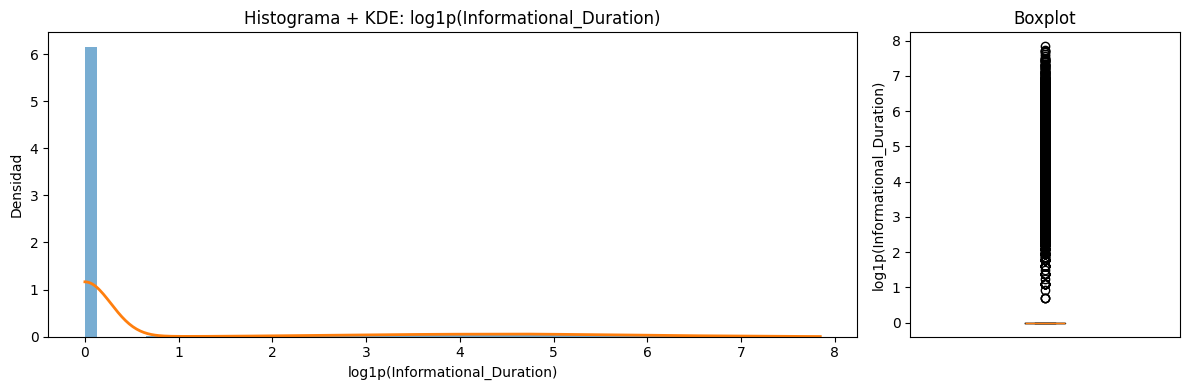

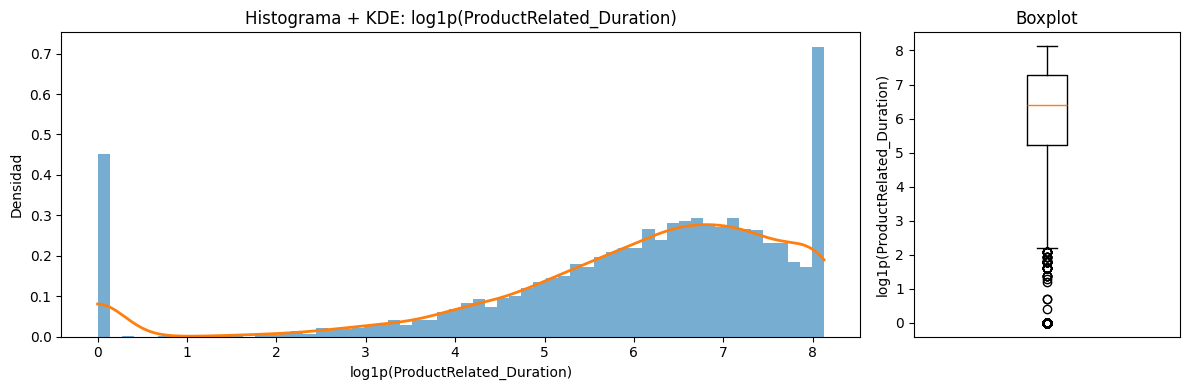

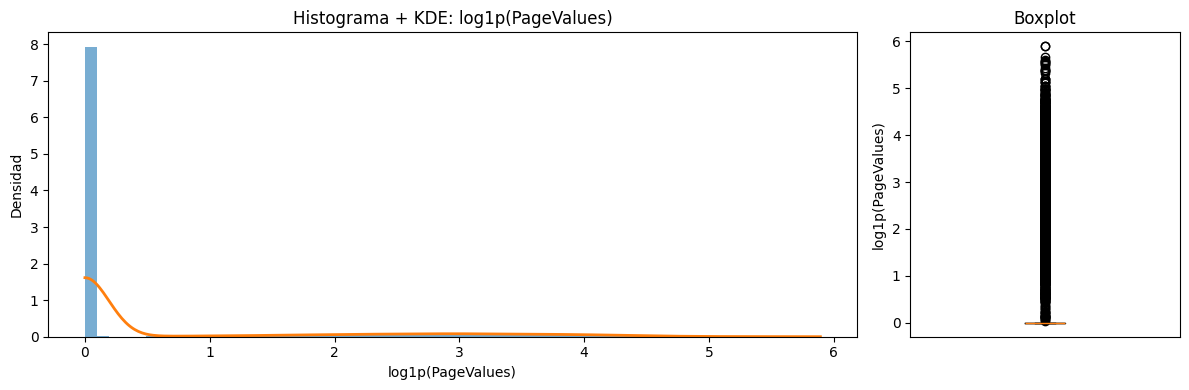

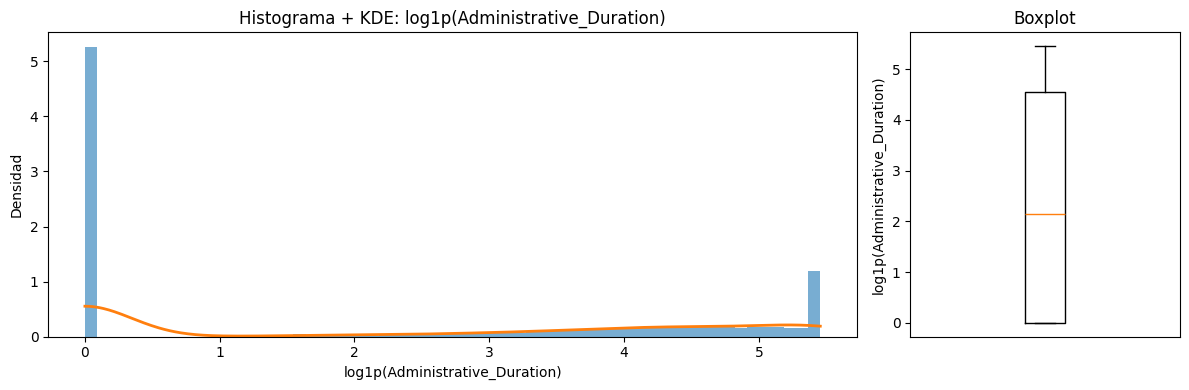

In [69]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import gaussian_kde

def plot_hist_kde_and_box(df, col, bins=50, log1p=False, clip_quantiles=None):
    """
    df: DataFrame
    col: nombre de la columna
    bins: bins del histograma
    log1p: si True, aplica log1p(x) para visualizar colas largas (no modifica df)
    clip_quantiles: None o tupla (q_low, q_high) para recortar SOLO en la visualización, ej (0.01, 0.99)
    """
    x = df[col].dropna().to_numpy(dtype=float)

    # Clip solo para visualizar (opcional)
    if clip_quantiles is not None:
        ql, qh = clip_quantiles
        lo, hi = np.quantile(x, [ql, qh])
        x = np.clip(x, lo, hi)

    # Transformación log1p para visualizar (opcional)
    if log1p:
        # log1p requiere x >= -1; en tus variables es >=0, así que OK
        x_plot = np.log1p(x)
        x_label = f"log1p({col})"
    else:
        x_plot = x
        x_label = col

    # --- Figura con 2 paneles: hist+kde y boxplot ---
    fig, axes = plt.subplots(1, 2, figsize=(12, 4), gridspec_kw={"width_ratios": [3, 1]})
    ax1, ax2 = axes

    # Histograma (densidad)
    ax1.hist(x_plot, bins=bins, density=True, alpha=0.6)
    ax1.set_title(f"Histograma + KDE: {x_label}")
    ax1.set_xlabel(x_label)
    ax1.set_ylabel("Densidad")

    # KDE
    if len(x_plot) > 1 and np.std(x_plot) > 0:
        kde = gaussian_kde(x_plot)
        xs = np.linspace(np.min(x_plot), np.max(x_plot), 400)
        ax1.plot(xs, kde(xs), linewidth=2)

    # Boxplot
    ax2.boxplot(x_plot, vert=True, showfliers=True)
    ax2.set_title("Boxplot")
    ax2.set_xticks([])
    ax2.set_ylabel(x_label)

    plt.tight_layout()
    plt.show()


# --- Variables principales (las tuyas) ---
main_vars = [
    "Informational_Duration",
    "ProductRelated_Duration",
    "PageValues",
    "Administrative_Duration",
]

for c in main_vars:
    plot_hist_kde_and_box(df, c, bins=60, log1p=True)


Dado que varias variables numéricas presentan una fuerte asimetría positiva, con gran concentración de valores cercanos a cero y colas largas hacia valores altos, se emplea la transformación log1p únicamente con fines exploratorios, con el objetivo de visualizar mejor la estructura interna de las distribuciones.

Para las variables Informational_Duration y PageValues incluso tras log1p, la masa principal sigue muy concentrada en 0. Esto quiere decir que están fuertemente cero-infladas, y la asimetría no se debe solo a escala, sino a la propia naturaleza del comportamiento, por lo que no se corrige únicamente con un log. Para estas seguramente sea adecuado un QuantilTransformer

Para la variable ProductRelated_Duration, vemos que tras log1p, la distribución se vuelve mucho más simétrica. Por lo tanto seguramente funcione muy bien Yeo-Johnson.

Administrative_Duration está en un punto medio: tras log1p se compacta, aunque no tanto. Por lo tanto también parece idonea para Yeo-Johnson.

En todos los casos descartamos la transformación log1p por la abultada cantidad de ceros.

### De Potencia

Probaremos a aplicar la transformación de Yeo-Johnson en las variables que hemos sugerido, y veremos si se nota mejora y cuán significativa es.

In [31]:
num_pipe_YJ = Pipeline([
    ("transform", PowerTransformer(method="yeo-johnson")),
    ("scaler", RobustScaler()),
])

num_cols_YJ = ['ProductRelated_Duration', 'Administrative_Duration']

num_pipe_rest = Pipeline([
    ("scaler", RobustScaler()),
])

num_cols_rest = [
    c for c in num_cols
    if c not in (num_cols_YJ)
]

preprocess = ColumnTransformer(
    transformers=[
        ("num_yj", num_pipe_YJ, num_cols_YJ),
        ("num_rest", num_pipe_rest, num_cols_rest),
        ("cat", OneHotEncoder(handle_unknown="ignore"), cat_cols),
    ]
)

results_df = evaluate_all(preprocess, model_grids, X, y)
results_df


LR
Fitting 3 folds for each of 6 candidates, totalling 18 fits
  best balanced_accuracy: 0.8183 ± 0.0024
  best params: {'model__C': 0.1, 'model__fit_intercept': True}

KNN
Fitting 3 folds for each of 6 candidates, totalling 18 fits
  best balanced_accuracy: 0.8212 ± 0.0026
  best params: {'model__n_neighbors': 21, 'model__weights': 'uniform'}

DT
Fitting 3 folds for each of 8 candidates, totalling 24 fits
  best balanced_accuracy: 0.8115 ± 0.0078
  best params: {'model__max_depth': 10, 'model__min_samples_split': 10}

RF
Fitting 3 folds for each of 4 candidates, totalling 12 fits
  best balanced_accuracy: 0.8419 ± 0.0079
  best params: {'model__max_depth': 20, 'model__min_samples_leaf': 5}


,model,best_score_mean,best_score_std
0,LR,0.818346,0.002388
1,KNN,0.821158,0.002639
2,DT,0.811460,0.007809
3,RF,0.841903,0.007888


Podemos ver que KNN ha mejorado claramente (antes: 0.7455 ± 0.0096), y el resto de modelos también han aumentado sus valores levemente, o no los han disminuido. Por lo tanto agregaremos esta técnica a nuestro pipeline final.

### Gaussiana

In [32]:
num_pipe_Q = Pipeline([
    ("transform", QuantileTransformer(output_distribution="normal", n_quantiles=200, random_state=0)),
    ("scaler", RobustScaler()),
])

num_cols_Q = ['Informational_Duration', 'PageValues']

num_pipe_rest = Pipeline([
    ("scaler", RobustScaler()),
])

num_cols_rest = [
    c for c in num_cols_rest
    if c not in (num_cols_Q)
]

preprocess = ColumnTransformer(
    transformers=[
        ("num_q", num_pipe_Q, num_cols_Q),
        ("num_yj", num_pipe_YJ, num_cols_YJ),
        ("num_rest", num_pipe_rest, num_cols_rest),
        ("cat", OneHotEncoder(handle_unknown="ignore"), cat_cols),
    ]
)


results_df = evaluate_all(preprocess, model_grids, X, y)
results_df


LR
Fitting 3 folds for each of 6 candidates, totalling 18 fits
  best balanced_accuracy: 0.8446 ± 0.0100
  best params: {'model__C': 0.1, 'model__fit_intercept': True}

KNN
Fitting 3 folds for each of 6 candidates, totalling 18 fits
  best balanced_accuracy: 0.8400 ± 0.0088
  best params: {'model__n_neighbors': 21, 'model__weights': 'uniform'}

DT
Fitting 3 folds for each of 8 candidates, totalling 24 fits
  best balanced_accuracy: 0.8108 ± 0.0081
  best params: {'model__max_depth': 10, 'model__min_samples_split': 10}

RF
Fitting 3 folds for each of 4 candidates, totalling 12 fits
  best balanced_accuracy: 0.8430 ± 0.0086
  best params: {'model__max_depth': 20, 'model__min_samples_leaf': 5}


,model,best_score_mean,best_score_std
0,LR,0.844647,0.009981
1,KNN,0.840033,0.008804
2,DT,0.810814,0.008105
3,RF,0.843043,0.008648


Se observan mejoras notables tanto para LR (antes: 0.8183 ± 0.0024) como para KNN (antes: 0.8212 ± 0.0026). Sin embargo para los árboles la diferencia es mínima, bajando ligeramente en DT (antes: 0.8115 ± 0.0078) y mejorando algo en RF (antes: 0.8419 ± 0.0079). Por lo tanto parece razonable seguir con el mismo preproceso para todos los casos, facilitando el trabajo futuro.

## Análisis de características

### Importancia de variables

#### Por métodos

Por qué solo LR Y DT??????

LR

In [74]:
preprocess = ColumnTransformer(
    transformers=[
        ("num_q", num_pipe_Q, num_cols_Q),
        ("num_yj", num_pipe_YJ, num_cols_YJ),
        ("num_rest", num_pipe_rest, num_cols_rest),
        ("cat", OneHotEncoder(handle_unknown="ignore"), cat_cols),
    ]
)

lr_final = LogisticRegression(
    max_iter=2000,
    C=0.1,
    fit_intercept=True,
    class_weight="balanced",
    random_state=rnd_st
)

pipe_lr = Pipeline([
    ("preprocess", preprocess),
    ("model", lr_final)
])

pipe_lr.fit(X, y)

feature_names = pipe_lr.named_steps["preprocess"].get_feature_names_out()

coefs = pipe_lr.named_steps["model"].coef_.ravel()
imp_lr = (
    pd.DataFrame({"feature": feature_names, "coef": coefs})
      .assign(abs_coef=lambda d: d["coef"].abs())
      .sort_values("abs_coef", ascending=False)
)

imp_lr.head(15)

,feature,coef,abs_coef
17,cat__Month_Nov,1.163354,1.163354
16,cat__Month_May,-0.790907,0.790907
67,cat__TrafficType_13,-0.672908,0.672908
15,cat__Month_Mar,-0.669188,0.669188
1,num_q__PageValues,0.587234,0.587234
12,cat__Month_Feb,-0.507733,0.507733
19,cat__Month_Sep,0.483324,0.483324
62,cat__TrafficType_8,0.476923,0.476923
59,cat__TrafficType_5,0.464927,0.464927
44,cat__Browser_12,0.430091,0.430091


En el caso de la regresión logística, la importancia de las variables se evalúa a partir de la magnitud absoluta de los coeficientes, dado que las variables han sido previamente transformadas y escaladas. Los resultados muestran que variables categóricas relacionadas con la estacionalidad (Month) y el canal de tráfico (TrafficType) presentan un impacto considerable en la probabilidad de conversión. En particular, el mes de noviembre destaca por su fuerte efecto positivo, lo cual es coherente con periodos promocionales. Entre las variables numéricas, PageValues aparece como una de las más influyentes, reforzando su papel como indicador del valor potencial de la sesión.

MEJORAR TEXTO!!

RF

In [33]:
preprocess = ColumnTransformer(
    transformers=[
        ("num_q", num_pipe_Q, num_cols_Q),
        ("num_yj", num_pipe_YJ, num_cols_YJ),
        ("num_rest", num_pipe_rest, num_cols_rest),
        ("cat", OneHotEncoder(handle_unknown="ignore"), cat_cols),
    ]
)

rf_final = RandomForestClassifier(
    class_weight="balanced",
    n_estimators=200,
    random_state=rnd_st,
    max_depth=20,
    min_samples_leaf=5)

pipe_rf = Pipeline([
    ("preprocess", preprocess),
    ("model", rf_final)
])

pipe_rf.fit(X, y)

feature_names_rf = pipe_rf.named_steps["preprocess"].get_feature_names_out()
fi = pipe_rf.named_steps["model"].feature_importances_

imp_rf = (
    pd.DataFrame({"feature": feature_names_rf, "importance": fi})
      .sort_values("importance", ascending=False)
)

imp_rf.head(15)

,feature,importance
1,num_q__PageValues,0.430590
8,num_rest__ExitRates,0.087710
2,num_yj__ProductRelated_Duration,0.079399
6,num_rest__ProductRelated,0.058078
7,num_rest__BounceRates,0.049870
4,num_rest__Administrative,0.038207
3,num_yj__Administrative_Duration,0.037736
17,cat__Month_Nov,0.032348
0,num_q__Informational_Duration,0.014760
5,num_rest__Informational,0.012180


En el caso de Random Forest, la importancia de variables muestra un dominio claro de PageValues, que concentra más de un tercio de la capacidad predictiva del modelo. A continuación, destacan variables relacionadas con el comportamiento de navegación del usuario, como la duración e intensidad de la visualización de productos y métricas de abandono (BounceRates y ExitRates). Las variables de contexto, como el mes o el tipo de visitante, presentan una importancia menor, lo que sugiere que su efecto es principalmente condicional y dependiente de interacciones con el comportamiento del usuario. En conjunto, los resultados de Random Forest y Regresión Logística ofrecen una visión complementaria del problema.

#### Por tipos

Variables categóricas

In [ ]:
from sklearn.feature_selection import mutual_info_classif

X_cat = pd.get_dummies(X[cat_cols], drop_first=False)

mi = mutual_info_classif(X_cat, y, discrete_features=True, random_state=42)

mi_cat = (
    pd.DataFrame({
        "feature": X_cat.columns,
        "mi": mi
    })
    .sort_values("mi", ascending=False)
)

mi_cat.head(15)

,feature,mi
4,TrafficType,0.015393
12,Month_Nov,0.010913
17,VisitorType_Returning_Visitor,0.004760
15,VisitorType_New_Visitor,0.004729
11,Month_May,0.003292
1,OperatingSystems,0.003248
10,Month_Mar,0.002101
7,Month_Feb,0.001700
2,Browser,0.001258
6,Month_Dec,0.000570


Variables numéricas

In [ ]:
num_cols = X.select_dtypes(include=np.number).columns

mi_num = mutual_info_classif(
    X[num_cols],
    y,
    discrete_features=False,
    random_state=42
)

mi_num_df = (
    pd.DataFrame({
        "feature": num_cols,
        "mi": mi_num
    })
    .sort_values("mi", ascending=False)
)

mi_num_df

,feature,mi
8,PageValues,0.164967
7,ExitRates,0.040910
5,ProductRelated_Duration,0.031448
6,BounceRates,0.023161
4,ProductRelated,0.022188
1,Administrative_Duration,0.016649
13,TrafficType,0.014052
0,Administrative,0.011750
3,Informational_Duration,0.010573
12,Region,0.007785


### Selección de características

In [16]:
print(X.columns)
print(len(X.columns))

Index(['Administrative', 'Administrative_Duration', 'Informational',
       'Informational_Duration', 'ProductRelated', 'ProductRelated_Duration',
       'BounceRates', 'ExitRates', 'PageValues', 'SpecialDay', 'Month',
       'OperatingSystems', 'Browser', 'Region', 'TrafficType', 'VisitorType',
       'Weekend'],
      dtype='object')
17


In [34]:
preprocess.fit(X, y)
preprocess.transform(X).shape[1]

75

Manual

In [43]:
set_A = [
     "PageValues",
     "ExitRates",
     "BounceRates",
     "ProductRelated_Duration",
     "ProductRelated",
     "Month",
     "TrafficType",
     "VisitorType",

]

set_B = set_A + [
    "Administrative_Duration",
    "Administrative",
]

set_C = set_B + [
    "Informational_Duration",
    "SpecialDay", "Weekend",
]

feature_sets = {
    "A_core": set_A,
    "B_core_plus_admin": set_B,
    "C_extended": set_C,
}

for name, model, grid, sampler in model_grids:
    print(f"--- {name} ---")

    for set_name, set_cols in feature_sets.items():
        print(f"--- {set_name} ---")

        num_cols_Q_set = [c for c in num_cols_Q if c in set_cols]
        num_cols_YJ_set = [c for c in num_cols_YJ if c in set_cols]
        num_cols_rest_set = [c for c in num_cols_rest if c in set_cols]
        cat_cols_set = [c for c in cat_cols if c in set_cols]

        preprocess_set = ColumnTransformer(
            transformers=[
                ("num_q", num_pipe_Q, num_cols_Q_set),
                ("num_yj", num_pipe_YJ, num_cols_YJ_set),
                ("num_rest", num_pipe_rest, num_cols_rest_set),
                ("cat", OneHotEncoder(handle_unknown="ignore"), cat_cols_set),
            ]
        )

        pipe_set = Pipeline([
            ("preprocess", preprocess_set),
            ("sampler", sampler),
            ("model", model),
        ])

        X_set = X[set_cols]
        res = evaluate(pipe_set, X_set, y, param_grid=grid, verbose=1)
        print(f"  best {res['scoring']}: {res['best_score_mean']:.4f} ± {res['best_score_std']:.4f}")
        print(f"  best params: {res['best_params']}\n")

--- LR ---
--- A_core ---
Fitting 3 folds for each of 6 candidates, totalling 18 fits
  best balanced_accuracy: 0.8465 ± 0.0098
  best params: {'model__C': 0.1, 'model__fit_intercept': False}

--- B_core_plus_admin ---
Fitting 3 folds for each of 6 candidates, totalling 18 fits
  best balanced_accuracy: 0.8467 ± 0.0092
  best params: {'model__C': 1, 'model__fit_intercept': False}

--- C_extended ---
Fitting 3 folds for each of 6 candidates, totalling 18 fits
  best balanced_accuracy: 0.8469 ± 0.0085
  best params: {'model__C': 1, 'model__fit_intercept': False}

--- KNN ---
--- A_core ---
Fitting 3 folds for each of 6 candidates, totalling 18 fits
  best balanced_accuracy: 0.8428 ± 0.0050
  best params: {'model__n_neighbors': 21, 'model__weights': 'uniform'}

--- B_core_plus_admin ---
Fitting 3 folds for each of 6 candidates, totalling 18 fits
  best balanced_accuracy: 0.8406 ± 0.0089
  best params: {'model__n_neighbors': 21, 'model__weights': 'uniform'}

--- C_extended ---
Fitting 3 fo

Los resultados son muy satisfactorios, ya que, aún habiendo reducido el número de variables, los resultados no se han visto afectados negativamente, obteniendo una mayor eficiencia. De hecho, tanto para DT (antes: 0.8108 ± 0.0081) como para RF (antes: 0.8430 ± 0.0086) los resultados han sido mejores para el primer set de datos, el A, el más compacto. Sin embargo en el caso de LR (antes: 0.8446 ± 0.0100) y KNN (antes: 0.8400 ± 0.0088) sí se nota una mejora al añadir más variables, siendo su mejor resultado con el set C, de los tres el que más columnas contiene, aunque sin llegar a incluirlas todas.

En todos los casos eso sí, cabe destacar que las mejoras han sido bastante leves, aunque en ningun caso han sido inferiores (de los tres sets A, B y C) en comparación con lo que habíamos hecho hasta ahora, por lo que podemos concluir que ciertas variables que no hemos incluido resultan ser contraproducentes.

Ahora probamos con SelectKBest sobre el dataset original.

In [40]:
param_grid_lr_skb = {
    "skb__k": [10, 20, 40, "all"],
    "model__C": [0.1, 1, 10],
    "model__fit_intercept": [True, False],
}

param_grid_knn_skb = {
    "skb__k": [10, 20, 40, "all"],
    "model__n_neighbors": [5, 11, 21],
    "model__weights": ["uniform", "distance"],
}

param_grid_dt_skb = {
    "skb__k": [10, 20, 40, "all"],
    "model__max_depth": [None, 10, 20, 30],
    "model__min_samples_split": [2, 10],
}

param_grid_rf_skb = {
    "skb__k": [10, 20, 40, "all"],
    "model__max_depth": [None, 20],
    "model__min_samples_leaf": [1, 5],
}

model_grids_skb = [
    ("LR", lr, param_grid_lr_skb, noop),
    ("KNN", knn, param_grid_knn_skb, ros),
    ("DT", dt, param_grid_dt_skb, noop),
    ("RF", rf, param_grid_rf_skb, noop),
]

rows = []

for name, model, grid, sampler in model_grids_skb:
    print(f"--- {name} ---")
    pipe = Pipeline([
        ("preprocess", preprocess),
        ("sampler", sampler),
        ("skb", SelectKBest(score_func=f_classif)),
        ("model", model),
    ])

    res = evaluate(pipe, X, y, param_grid=grid, verbose=1)

    rows.append({
        "model": name,
        "best_score_mean": res["best_score_mean"],
        "best_score_std": res["best_score_std"],
    })

    print(f"  best {res['scoring']}: {res['best_score_mean']:.4f} ± {res['best_score_std']:.4f}")
    print(f"  best params: {res['best_params']}")

results_df = pd.DataFrame(rows).sort_values("best_score_mean", ascending=False)
results_df


--- LR ---
Fitting 3 folds for each of 24 candidates, totalling 72 fits
  best balanced_accuracy: 0.8470 ± 0.0078
  best params: {'model__C': 1, 'model__fit_intercept': False, 'skb__k': 40}
--- KNN ---
Fitting 3 folds for each of 24 candidates, totalling 72 fits
  best balanced_accuracy: 0.8431 ± 0.0110
  best params: {'model__n_neighbors': 21, 'model__weights': 'distance', 'skb__k': 40}
--- DT ---
Fitting 3 folds for each of 32 candidates, totalling 96 fits
  best balanced_accuracy: 0.8108 ± 0.0081
  best params: {'model__max_depth': 10, 'model__min_samples_split': 10, 'skb__k': 'all'}
--- RF ---
Fitting 3 folds for each of 16 candidates, totalling 48 fits
  best balanced_accuracy: 0.8430 ± 0.0086
  best params: {'model__max_depth': 20, 'model__min_samples_leaf': 5, 'skb__k': 'all'}


,model,best_score_mean,best_score_std
0,LR,0.846999,0.007806
1,KNN,0.843144,0.010980
3,RF,0.843043,0.008648
2,DT,0.810814,0.008105


Mejor para LR. El resto mejor con los sets manuales

## Resumen y Conclusiones

# Y el randomstate???????